In [68]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [69]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_excel("C:/ai/Raisin_Dataset.xlsx")
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [70]:
df_e=df.copy()
for i in df.columns:
    # LabelEncoder 객체 생성
    label_encoder = LabelEncoder()
    # 'label' 컬럼을 숫자로 변환
    df_e[i] = LabelEncoder().fit_transform(df[i])
df_e

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1
...,...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461,0
896,549,546,540,508,549,99,577,0
897,640,517,739,174,650,722,656,0
898,600,633,506,683,600,177,622,0


In [83]:
X=df_e.drop('Class',axis=1).values
y=pd.get_dummies(df_e['Class']).values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.shape)
print(y.shape)
print(y)

(900, 7)
(900, 2)
[[False  True]
 [False  True]
 [False  True]
 ...
 [ True False]
 [ True False]
 [ True False]]


In [85]:
# 딥러닝 모델

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(15,input_shape=(X_train.shape[1],),activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(y_train.shape[1],activation='softmax'))

#model.compile(Adam(learning_rate=0.02),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.002),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_83 (Dense)                │ (None, 15)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 2)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 347 (1.36 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
# 딥러닝 훈련

model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=4,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5369 - loss: 0.6882 - val_accuracy: 0.3971 - val_loss: 0.6957
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.5478 - loss: 0.6760 - val_accuracy: 0.6912 - val_loss: 0.6713
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.7525 - loss: 0.6502 - val_accuracy: 0.6912 - val_loss: 0.6278
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.7294 - loss: 0.6044 - val_accuracy: 0.6912 - val_loss: 0.6053
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.7411 - loss: 0.5536 - val_accuracy: 0.7059 - val_loss: 0.5789
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.7316 - loss: 0.5498 - val_accuracy: 0.7794 - val_loss: 0.5438
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.7842 - loss: 0.5015 - val_accuracy: 0.7647 - val_loss: 0.5337
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7565 - loss: 0.5322 - va

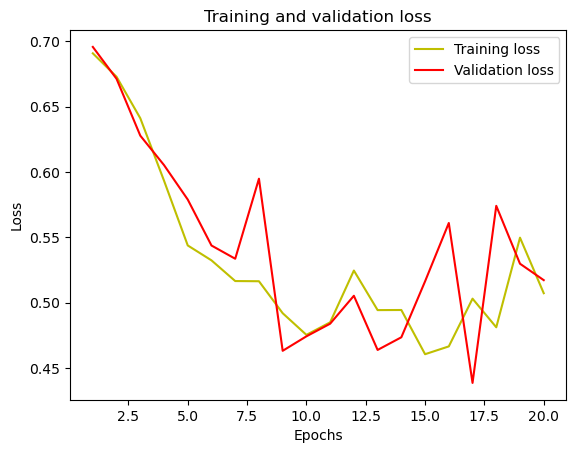

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [88]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.48      0.62       115
           1       0.63      0.93      0.75       110

    accuracy                           0.70       225
   macro avg       0.75      0.70      0.68       225
weighted avg       0.75      0.70      0.68       225

[[ 55  60]
 [  8 102]]


In [90]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# 데이터에서 독립 변수(Outcome 제외)를 추출
X = df.drop('Class', axis=1)

X_scaled = StandardScaler().fit_transform(X)

In [91]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [92]:
# 축소된 데이터 복원 (원래 차원으로 복원)
X_reconstructed = pca.inverse_transform(X_pca)

# 원본 데이터와 복원된 데이터 비교 (MSE 계산)
mse = mean_squared_error(X_scaled, X_reconstructed)
print(mse)

0.0010629572641279723


In [95]:
X_pca

array([[ 0.07699386, -0.45332809, -1.08921421,  0.02678873,  0.14138649],
       [-0.4753759 ,  0.44536837,  0.0163725 , -0.1159446 ,  0.12199549],
       [ 0.37210892,  0.80200814,  0.78648709, -0.2649626 ,  0.0621901 ],
       ...,
       [ 0.68245105, -1.30819857,  0.09173245, -0.06681526,  0.26292546],
       [ 0.64840957,  0.97924814,  0.09141348, -0.08060355,  0.07802635],
       [ 0.48755479,  2.10811637, -0.19194068,  0.26589367,  0.06284792]])

In [103]:
for i in range(5):
    # LabelEncoder 객체 생성
    label_encoder = LabelEncoder()
    # 'label' 컬럼을 숫자로 변환
    X_pca[:,i] = LabelEncoder().fit_transform(X_pca[:,i])
print(X_pca)
print(X_pca.shape)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y,test_size=0.25,random_state=0)

[[541. 287.  73. 598. 809.]
 [435. 593. 463. 273. 773.]
 [582. 692. 776.  37. 565.]
 ...
 [625. 109. 503. 390. 891.]
 [620. 734. 502. 357. 614.]
 [597. 863. 360. 809. 567.]]
(900, 5)


In [104]:
# 딥러닝 모델

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(15,input_shape=(X_train_p.shape[1],),activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(y_train_p.shape[1],activation='softmax'))

#model.compile(Adam(learning_rate=0.02),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.002),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                │ (None, 15)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 2)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 317 (1.24 KB)

 Trainable params: 317 (1.24 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# 딥러닝 훈련

model_history2=model.fit(x=X_train_p, y=y_train_p, epochs=20, batch_size=4,validation_split=0.1)
y_pred_p = model.predict(X_test_p)

y_test_class_p = np.argmax(y_test_p,axis=1)
y_pred_class_p = np.argmax(y_pred_p,axis=1)

Epoch 1/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4466 - loss: 0.8943 - val_accuracy: 0.6029 - val_loss: 0.6738
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.5442 - loss: 0.6857 - val_accuracy: 0.5294 - val_loss: 0.6855
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.6876 - loss: 0.6674 - val_accuracy: 0.6324 - val_loss: 0.6526
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.7233 - loss: 0.6329 - val_accuracy: 0.6618 - val_loss: 0.6289
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.7691 - loss: 0.5772 - val_accuracy: 0.7353 - val_loss: 0.5576
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8308 - loss: 0.5139 - val_accuracy: 0.7206 - val_loss: 0.5024
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.7642 - loss: 0.5014 - val_accuracy: 0.8235 - val_loss: 0.4635
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8098 - loss: 0.4532 - va

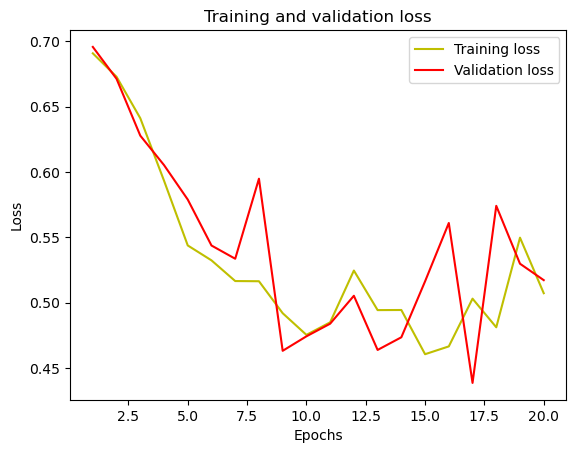

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [107]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.48      0.62       115
           1       0.63      0.93      0.75       110

    accuracy                           0.70       225
   macro avg       0.75      0.70      0.68       225
weighted avg       0.75      0.70      0.68       225

[[ 55  60]
 [  8 102]]
